In [1]:
### Problem 1: Auto Fuel Economy

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import sem, t
from scipy import mean

%matplotlib inline

#### Settings for Seaborn and plotting

In [3]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11,8)})
sns.set_context("paper", font_scale=1.5)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Import data

In [4]:
# read the csv file
df = pd.read_csv('data/vehicles.csv')

/Users/pradeepsingh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (73,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
## select only a few columns from the dataframe, use only 'Year','Make','FuelType1','Combined MGP (comb08)' columns.

df = df[['year','make','comb08','comb08U','fuelType1']]
#df = df[['year','make','comb08','comb08U','combA08','combA08U','fuelType1']]

In [6]:
df.head(3)

,year,make,comb08,comb08U,fuelType1
0,1985,Alfa Romeo,21,0.0,Regular Gasoline
1,1985,Ferrari,11,0.0,Regular Gasoline
2,1985,Dodge,27,0.0,Regular Gasoline


In [7]:
### select the dataframe with 'Years' >= 2000 and 'Years' <= 2019 and 
### select column 'fuelType1' with gasoline.

In [8]:
# list to select only vechicels that use gasoline
gasoline = ['Premium Gasoline', 'Regular Gasoline', 'Midgrade Gasoline']

In [9]:
df = df.loc[(df['year'] >= 2000) & (df['year'] <= 2019)]
df = df.loc[df['fuelType1'].isin(gasoline)]

In [10]:
df.head()

,year,make,comb08,comb08U,fuelType1
6210,2000,Acura,18,0.0,Premium Gasoline
6212,2000,Acura,18,0.0,Premium Gasoline
6213,2000,BMW,19,0.0,Premium Gasoline
6214,2000,BMW,19,0.0,Premium Gasoline
6215,2000,BMW,19,0.0,Premium Gasoline


In [11]:
### dict to map subrands to brands in 'make' column.

subbrand_to_brand = {"Acura": "Honda", "Alfa Romeo": "Chrysler", "Buick": "General Motors", 
                     "Cadillac": "General Motors","Chevrolet": "General Motors", "Chrysler": "Chrysler", 
                     "Daihatsu": "Toyota", "Dodge": "Chrysler", "Fiat": "Chrysler", "Ford": "Ford",
                     "GMC": "General Motors", "Honda": "Honda", "Jeep": "Chrysler", "Lexus": "Toyota", 
                     "Lincoln": "Ford", "Maserati": "Chrysler", "Mercury": "Ford", "Pontiac": "General Motors", 
                     "Ram": "Chrysler", "Saturn": "General Motors", "Scion": "Toyota", "Subaru": "Toyota", 
                     "Toyota": "Toyota"}


In [12]:
## map every key to value in 'make' column using dict subbrand_to_brand.

df['make'] = df['make'].map(subbrand_to_brand)

In [13]:
df.head()

,year,make,comb08,comb08U,fuelType1
6210,2000,Honda,18,0.0,Premium Gasoline
6212,2000,Honda,18,0.0,Premium Gasoline
6213,2000,NaN,19,0.0,Premium Gasoline
6214,2000,NaN,19,0.0,Premium Gasoline
6215,2000,NaN,19,0.0,Premium Gasoline


### 1. Box plots per company for the MPG over the years.

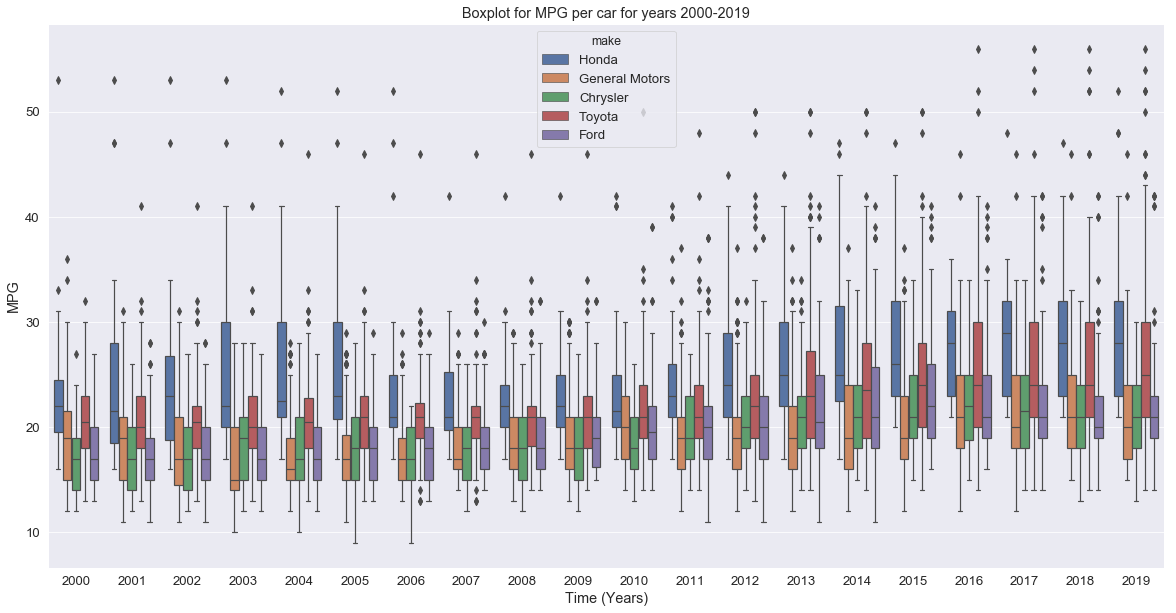

In [14]:
# boxplot for mpg per year for every company.

plt.figure(figsize=(20,10))
plot = sns.boxplot(x='year', y='comb08', hue='make',data=df)
plot.set(xlabel='Time (Years)', ylabel='MPG')
plot.set_title("Boxplot for MPG per car for years 2000-2019")
plt.show()

Almost in all cases, median MPG for Honda vehicles is higher than the other vehicles. And, since in most years the longer part of the box is to the right (or above) the median, therefore data is skewed to the right. After Honda, it's the Toyota vehicles that have 2nd highest median MPG in most years and even it's data is skewed to the right.

Other vehicles like Ford, Chrysler, General Motors have somewhat similar median MPG. In following years, 2000 to 2002, 2006 to 2009, and 2015 to 2019, all 3 companies have very similar median MPG and have data symmetrically distributed.

Among all vehicles, Honda and Toyota produces vehiles that have higher median MPG.

### 2. Plot the yearly mean mpg over all vehicles sold by that company per year.  

In [15]:
# list to loop over columns values in 'year' and 'brand'
year_list = list(range(2000,2019))
brand_list = ['Honda','Toyota','General Motors','Ford','Chrysler']

In [16]:
### create 2 new dataframe to store Mean/ Max of MPG per year per company.
mpg_data = pd.DataFrame(columns=['Year','Brand','Mean Mpg','Max Mpg'])


In [17]:
# loop over every brand for every year and compute the mean and 
# max MPG for that year and append it in mpg_data dataframe.

for i in brand_list:
    for j in range(2000,2020):
        new_df = df.loc[(df['year'] == j) & (df['make'] == i)]
        mean_mpg = new_df['comb08'].mean()
        max_mpg = new_df['comb08'].max()
        cumsum = new_df['comb08'].sum()
        mpg_data = mpg_data.append({'Year':j,'Brand':i,'Mean Mpg':mean_mpg, 
                                    'Max Mpg':max_mpg}, ignore_index = True)

In [18]:
mpg_data.head()

,Year,Brand,Mean Mpg,Max Mpg
0,2000,Honda,23.258065,53
1,2001,Honda,24.735294,53
2,2002,Honda,24.531250,53
3,2003,Honda,26.351351,53
4,2004,Honda,26.289474,52


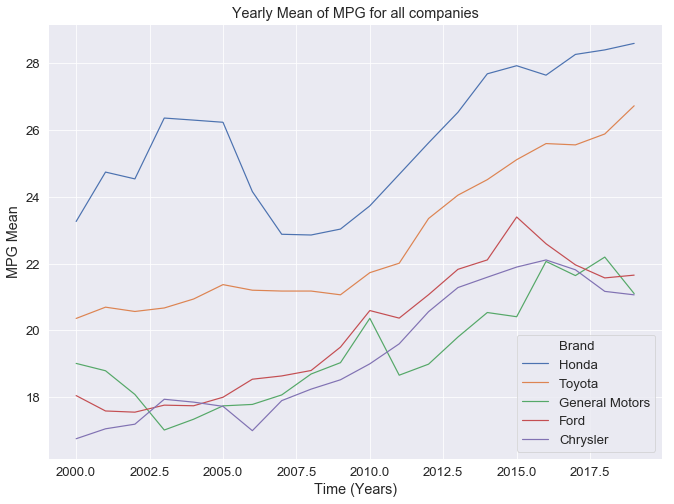

In [19]:
plot = sns.lineplot(x='Year', y='Mean Mpg', hue='Brand', data=mpg_data)
plot.set(xlabel='Time (Years)', ylabel='MPG Mean')
plot.set_title("Yearly Mean of MPG for all companies")
plt.show()

From above plots we can draw following conclusions:
1. Honda: On an average Honda vehciles gives the highest mean mpg among other vehciles. From year 2005 to 2007, there was a significant drop in Honda vehciles mean mpg. Then again it started to increase from 2007-08.
2. Toyota: After Honda vehciles, it's Toyota that have the highest mean MPG. And, it's mean MPG is increasing steadily over the years without any dip like Honda.
3. Ford, Chrysler and General Motors: Among these 3 brands, Ford vehicles have the highest mean MPG. But, still all of have comparebale mean MPG. General Motors have somewhat zig-zag (increasing-decreasing) curve for mean MPG, unlike, Ford and Chrysler who have steady increasing curve.


### 3. Plot the mpg for each company per year of their most fuel efficient vehicle each year. 

In [20]:
# convert Max MPG into numeric
Max_Mpg = pd.to_numeric(mpg_data['Max Mpg'])

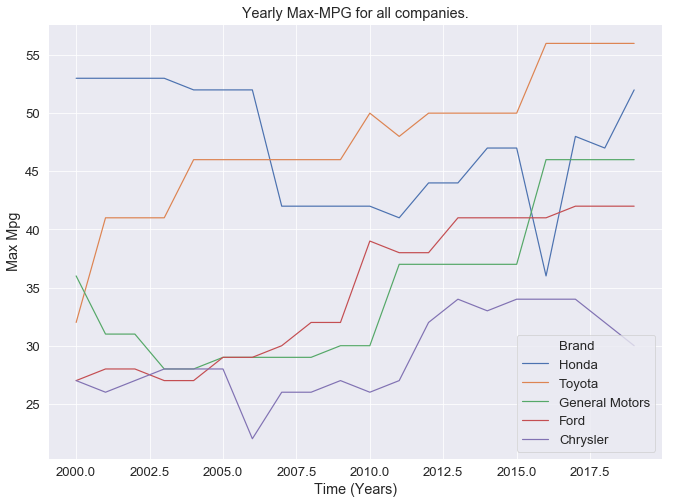

In [21]:
# Plot Max MPG for every compay for every year.

plot1 = sns.lineplot(x="Year", y=Max_Mpg, hue="Brand", data=mpg_data)
plot1.set(xlabel='Time (Years)', ylabel='Max Mpg')
plot1.set_title("Yearly Max-MPG for all companies.")
plt.show()

From above plots we can draw following conclusions:
1. Honda: Max MPG for Honda have decreased over the years(from 2006 to 2013 and then for 2015-2016). In fact, Toyota have taken over Honda in Max MPG in 2006 and have stayed ahead till 2019. Honda did made some progress from 2016 to 2019 but they are still behind Toyota.
2. Toyota: Max MPG for Toyota have increased every year since 2000 to 2016 and then have remained constat. It surpassed Honda in 2006.
3. General Motors: Max MPG for GM decreased from 2000 till 2003 and remained somewhat constatnt till 2010. Since 2010 it's been increasing.
4. Ford: Max MPG for Ford is increasing ever since 2000.
5. Chrysler: Max MPG for Chrysler was alsmot constant from 2000 to 2005, then it drasticaly decreased for 2006 and then increased again till 2015 and decreassing again for 2016-2019.


Overall, Toyota, Ford and GM are making vehicles that have increasing efficiency every year.